# Машинное обучение

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [82]:
import numpy as np

Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [84]:
def max_element(x):
    if any(x == 0):
        inds_of_zero = np.where(x==0)
        our_inds = inds_of_zero[0]+1
        if any(our_inds > len(x)-1):
            our_inds = our_inds[:-1]
            res = x[our_inds].max()
            return res
        else:
            res = x[our_inds].max()
            return res
    else:
        return None
arr=np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]);
print(max_element(arr))

5


Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [86]:
def nearest_value(X, v):
    substract_arr = abs(X - v)
    min_inds = substract_arr.argmin()
    X = X.flatten()
    return X[min_inds]

x = np.arange(0,10).reshape((2, 5)) 
v = 3.6
print(nearest_value(x, v))

4


Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [98]:
def scale(X):
    means = np.mean(X, axis=1)
    stds = np.std(X, axis=1)
    return ((X - means)/stds)
mtx = np.random.randint(0, 100, size = (3, 3)) 
print(scale(mtx))

[[-0.96241971  0.81649658  1.66151488]
 [ 0.36415881 -1.22474487  0.22302213]
 [ 0.67629493 -0.69402209 -1.0147507 ]]


 Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [105]:
def get_stats(X):
    parameters = []
    determinition = np.linalg.det(X)
    trace = np.trace(X)
    MIN = X.min()
    MAX = X.max()
    norm_frob = np.linalg.norm(X, 'fro')
    self_num = np.linalg.eig(X)
    inverted = np.linalg.inv(X)
    parameters.extend([determinition, trace, MIN, MAX, norm_frob, self_num, inverted])
    print('Определитель: ', determinition, '\n'
     'След: ', trace, '\n'
     'MIN/MAX: ', MIN, '/', MAX, '\n'
     'Норма Фробениуса: ', norm_frob, '\n'
     'Собственные числа: ' '\n', self_num, '\n'
     'Обратная матрица: ' '\n', inverted)
    return parameters

X = np.random.randn(2, 2)
get_stats(X)

Определитель:  -0.48529387935463225 
След:  -0.19244480193565794 
MIN/MAX:  -0.6801831885104209 / 0.4999732065468236 
Норма Фробениуса:  1.0221655089328598 
Собственные числа: 
 (array([ 0.60702196, -0.79946676]), array([[ 0.97269988, -0.36206467],
       [ 0.23206667,  0.93215298]])) 
Обратная матрица: 
 [[ 1.40159029  1.03024833]
 [ 0.63281514 -1.00503717]]


[-0.48529387935463225,
 -0.19244480193565794,
 -0.6801831885104209,
 0.4999732065468236,
 1.0221655089328598,
 (array([ 0.60702196, -0.79946676]), array([[ 0.97269988, -0.36206467],
         [ 0.23206667,  0.93215298]])),
 array([[ 1.40159029,  1.03024833],
        [ 0.63281514, -1.00503717]])]

Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

Среднее значение у максимальных элементов 189.1814311606545


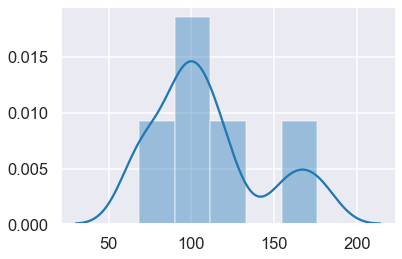

In [106]:
matrix1 = np.random.normal(3, 2.5, size=(10, 10))
matrix2 = np.random.normal(3, 2.5, size=(10, 10))
matrix = matrix1.dot(matrix2)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.distplot(matrix[0])
nums = []
for exp_num in range(100):
    matrix1 = np.random.normal(3, 2.5, size=(10, 10))
    matrix2 = np.random.normal(3, 2.5, size=(10, 10))
    nums.append(np.max(matrix1.dot(matrix2)))
    
print('Среднее значение у максимальных элементов',np.average(nums))

### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [100]:
import pandas as pd
%matplotlib inline

In [101]:
df = pd.read_csv('2008.csv')
df_jan_apr = df[df['Month'] < 5]

Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

MAX value code:  A


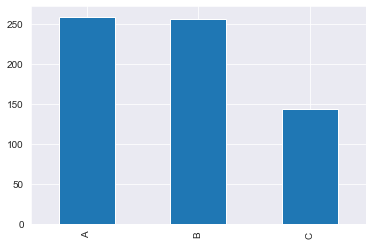

In [102]:
J_A = df_jan_apr['CancellationCode'].dropna()
J_A.value_counts()
J_A.value_counts().plot(kind='bar')
print('MAX value code: ', J_A.value_counts().idxmax())
#### Ответ: carrier

 Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [103]:
df_jan_apr['Distance'].describe()[['50%', 'min', 'max']]

50%     576.0
min      31.0
max    4962.0
Name: Distance, dtype: float64

 Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [104]:
min_dist = df_jan_apr[df_jan_apr['Distance']==df_jan_apr['Distance'].describe()['min']]

In [105]:
min_dist[['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'FlightNum']]

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum
27534,3,11,2,AS,64
48112,2,28,4,AS,64


In [106]:
carriers = pd.read_csv('carriers.csv')
carriers[carriers['Code']=='AS']

,Code,Description
221,AS,Alaska Airlines Inc.


In [107]:
flights64_65 = df[(df['FlightNum']==64)] # Среднее расстояние, пройденное этим же рейсом в другие дни
flights64_65.groupby('FlightNum')['Distance'].agg([np.mean, np.max])

,mean,amax
FlightNum,,
64,748.128205,2381


Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [108]:
airports = pd.read_csv('airports.csv')
airports[airports['iata']==df_jan_apr['Origin'].value_counts().idxmax()]['city']

880    Atlanta
Name: city, dtype: object

Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [109]:
df_jan_apr.groupby('Origin')['AirTime'].agg(np.mean)

Origin
ABE    88.375000
ABI    37.153846
ABQ    90.868613
ABY    37.666667
ACT    30.142857
         ...    
WRG    24.500000
XNA    90.431818
YAK    35.000000
YKM    77.000000
YUM    46.071429
Name: AirTime, Length: 280, dtype: float64

In [110]:
print('Максимальное среднее значение полета у аэропорта: ', df_jan_apr.groupby('Origin')['AirTime'].agg(np.mean).idxmax())
print('Полное название аэропорта: ',airports[airports['iata']==df_jan_apr.groupby('Origin')['AirTime'].agg(np.mean).idxmax()]['city'])

Максимальное среднее значение полета у аэропорта:  PSE
Полное название аэропорта:  2674    Ponce
Name: city, dtype: object


Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [111]:
most = df_jan_apr["Origin"].value_counts() > 1000
fin = most[most==True].index.tolist()
over1000 = df_jan_apr[df_jan_apr['Origin'].isin(fin)]
over1001 = over1000[over1000['DepDelay'] > 0]
over1001.groupby('Origin')['DepDelay'].sum()
airports[airports['iata']==over1001.groupby('Origin')['DepDelay'].sum().idxmax()]['airport']

2531    Chicago O'Hare International
Name: airport, dtype: object

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')
sns.set_context('talk')

In [3]:
df = pd.read_csv('2008.csv')

In [4]:
allnans = df.isna().sum().sum()
colnan  = (df.isna().sum() > 0).value_counts()[1]
objnan  = ((df.isna().sum(axis=1))>0).value_counts()
# Судя по всему во всем датафрейме в каждой строке есть хотя бы одно пропущенное значение
        
print('Имеются ли в данных пропущенные значения?:', 'Да')
print('Сколько всего пропущенных элементов в таблице "объект-признак"?:', allnans)
print('Сколько объектов имеют хотя бы один пропуск?:', objnan)
print('Сколько признаков имеют хотя бы одно пропущенное значение?: ', colnan)

Имеются ли в данных пропущенные значения?: Да
Сколько всего пропущенных элементов в таблице "объект-признак"?: 355215
Сколько объектов имеют хотя бы один пропуск?: True    70000
dtype: int64
Сколько признаков имеют хотя бы одно пропущенное значение?:  16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [5]:
print('Имеются ли пропущенные значения в целевой переменной? ', df['DepDelay'].isnull().sum(), str('пропущенных значений'))

Имеются ли пропущенные значения в целевой переменной?  1399 пропущенных значений


In [6]:
NAN_depdelay = df[df['DepDelay'].isnull()]
NAN_depdelay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 11 to 69949
Data columns (total 29 columns):
Year                 1399 non-null int64
Month                1399 non-null int64
DayofMonth           1399 non-null int64
DayOfWeek            1399 non-null int64
DepTime              0 non-null float64
CRSDepTime           1399 non-null int64
ArrTime              0 non-null float64
CRSArrTime           1399 non-null int64
UniqueCarrier        1399 non-null object
FlightNum            1399 non-null int64
TailNum              579 non-null object
ActualElapsedTime    0 non-null float64
CRSElapsedTime       1395 non-null float64
AirTime              0 non-null float64
ArrDelay             0 non-null float64
DepDelay             0 non-null float64
Origin               1399 non-null object
Dest                 1399 non-null object
Distance             1399 non-null int64
TaxiIn               0 non-null float64
TaxiOut              0 non-null float64
Cancelled            1399 non-nul

Вообщем там где DepDelay имеет NAN значения, столько же пропущенных значений присутсвует и в некоторых других признаках.
Объединяет их то что пропущенные значения относятся в основном к значениям с Delay такие как: CarrierDelay, WeatherDelay и т.д.
Таким образом мы можем спокойно дропнуть пропущенные значения объектов в DepDelay.

In [7]:
df = df.dropna(subset=['DepDelay'], axis=0)
df = df[df['DepDelay'] != 0]

#Чтобы применить функцию преобразования в часы и минуты, избавимся также от NAN значений в данных признаках
df = df.dropna(subset=['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'], axis=0)

#y = df[['DepDelay']]
y = df['DepDelay']

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [8]:
def transform_to_hour(col):
    s = []
    for i in df[col]:
        if np.isnan(i):
            s.append(np.nan)
        else:
            if len(str(int(i))) > 2:
                s.append(int(str(int(i))[0:len(str(int(i)))-2]))
            else: s.append(0)
    df['{}_Hour'.format(col)] = s

def transform_to_min(col):
    s = []
    for i in df[col]:
        if np.isnan(i):
            s.append(np.nan)
        else:
            s.append(int(str(int(i))[len(str(int(i)))-2:]))
    df['{}_Minute'.format(col)] = s
    
    
transform_to_hour('DepTime')
transform_to_min('DepTime')

transform_to_hour('CRSDepTime')
transform_to_min('CRSDepTime')

transform_to_hour('ArrTime')
transform_to_min('ArrTime')

transform_to_hour('CRSArrTime')
transform_to_min('CRSArrTime')

df = df.drop(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'], axis=1)

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [9]:
df.corr()

,Year,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000,-0.004919,-0.010830,0.006224,-0.014230,-0.005554,-0.012840,-0.041950,-0.029353,...,0.008620,0.017445,-0.009363,0.002433,-0.007234,0.011447,-0.002887,-0.001491,0.002728,-0.005542
DayofMonth,NaN,-0.004919,1.000000,0.015477,0.009766,-0.008110,-0.007126,-0.007842,0.006479,0.008777,...,-0.007752,0.009641,0.001605,0.006120,0.002224,-0.000978,-0.001435,-0.006125,0.000656,0.000891
DayOfWeek,NaN,-0.010830,0.015477,1.000000,-0.005926,0.010330,0.012959,0.011541,0.002943,0.008467,...,0.005031,0.007566,0.005990,-0.000598,0.005715,-0.000763,0.005762,-0.000901,0.006145,0.000784
FlightNum,NaN,0.006224,0.009766,-0.005926,1.000000,-0.324021,-0.331305,-0.336906,0.027777,0.021709,...,0.009387,-0.022415,-0.003909,-0.006843,-0.011679,-0.002678,-0.019202,0.001697,-0.031448,0.018681
ActualElapsedTime,NaN,-0.014230,-0.008110,0.010330,-0.324021,1.000000,0.979979,0.984401,0.089451,0.041946,...,0.002250,-0.085353,-0.017290,0.000991,-0.016923,0.009981,0.033067,0.000021,0.052552,0.005242
CRSElapsedTime,NaN,-0.005554,-0.007126,0.012959,-0.331305,0.979979,1.000000,0.988293,0.010358,0.033961,...,0.003952,-0.041558,-0.014360,0.001281,-0.011778,0.011823,0.034166,0.002003,0.057892,0.005095
AirTime,NaN,-0.012840,-0.007842,0.011541,-0.336906,0.984401,0.988293,1.000000,0.031206,0.025237,...,0.004590,-0.060884,-0.023179,0.001006,-0.020695,0.011579,0.026744,0.000545,0.045576,0.002669
ArrDelay,NaN,-0.041950,0.006479,0.002943,0.027777,0.089451,0.010358,0.031206,1.000000,0.933526,...,0.008990,0.509705,0.181565,-0.016460,0.119652,0.017466,0.062637,0.002412,0.115969,0.009064
DepDelay,NaN,-0.029353,0.008777,0.008467,0.021709,0.041946,0.033961,0.025237,0.933526,1.000000,...,0.010668,0.553806,0.203472,-0.017047,0.140416,0.022270,0.070181,0.006171,0.135523,0.009172


In [10]:
df = df.drop(['CarrierDelay', 'WeatherDelay','NASDelay', 'SecurityDelay','LateAircraftDelay'], axis=1)

In [11]:
df = df.drop(['TailNum', 'Year', 'ArrDelay', 'Cancelled', 'CancellationCode',\
              'DepDelay', 'ActualElapsedTime', 'CRSElapsedTime', 'Distance'], axis=1)

In [12]:
df_for_scale = df

Избавляемся от упомянутых в задании признаков, а так же от ArrDelay за его чрезмерную корреляцию с целевым признаком,
от самого целевого признака, а так же от Cancelled и Cancellation Code за плохую выборку в данных 
(Cancelled практически полностью состоит из нулей, а Cancellation Code просто имеет мало значений)

In [13]:
#-------------------------------------------------------------------------------------------------

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

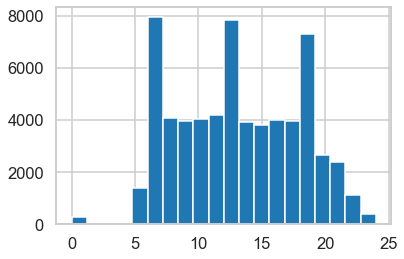

In [14]:
df_for_scale['DepTime_Hour'].hist(bins=20);

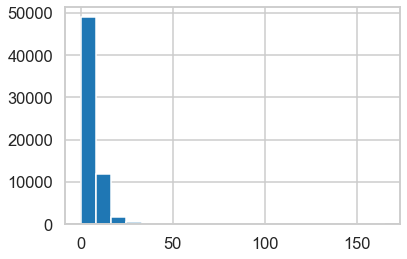

In [15]:
df_for_scale['TaxiIn'].hist(bins=20);

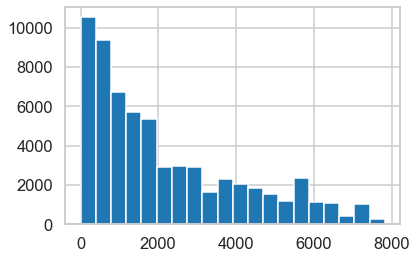

In [16]:
df_for_scale['FlightNum'].hist(bins=20);

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Вывод: Числа сильно разнятся по отношению к друг другу, поэтому при подсчете и умножении наших значений на коэффициенты мы будем получать "не пропорциональные" данные. Чтобы избежать данную проблему, мы масштабируем количественные признаки по отношению друг к другу.

In [17]:
#-------------------------------------------------------------------------------------------------

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63264 entries, 0 to 69999
Data columns (total 19 columns):
Month                63264 non-null int64
DayofMonth           63264 non-null int64
DayOfWeek            63264 non-null int64
UniqueCarrier        63264 non-null object
FlightNum            63264 non-null int64
AirTime              63240 non-null float64
Origin               63264 non-null object
Dest                 63264 non-null object
TaxiIn               63264 non-null float64
TaxiOut              63264 non-null float64
Diverted             63264 non-null int64
DepTime_Hour         63264 non-null int64
DepTime_Minute       63264 non-null int64
CRSDepTime_Hour      63264 non-null int64
CRSDepTime_Minute    63264 non-null int64
ArrTime_Hour         63264 non-null int64
ArrTime_Minute       63264 non-null int64
CRSArrTime_Hour      63264 non-null int64
CRSArrTime_Minute    63264 non-null int64
dtypes: float64(3), int64(13), object(3)
memory usage: 9.7+ MB


In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [20]:
def transform_data(data):
    '''Заполним пропущенные значения нулями'''
    for i in df.columns:
        if df[i].dtype == 'object':
            df[i] = df[i].fillna('nan')
        else:
            df[i] = df[i].fillna(0)
    
    '''Сформируем списки с количественными и категориальными признаками'''
    lst_col = []
    lst_category = []
    for i in df_for_scale:
        if df_for_scale[i].nunique() < 3:
            lst_category.append(i)
            continue
        if df_for_scale[i].dtypes == 'O':
            lst_category.append(i)
            continue
        else:
            lst_col.append(i)
            continue
    '''Отнормируем количественные признаки'''
    ss.fit(df_for_scale[lst_col])
    X_col = ss.transform(df_for_scale[lst_col])
    df_col = pd.DataFrame(X_col, columns=lst_col)
    
    '''Отнормируем по категориальным признакам'''
    df_cat = pd.get_dummies(df_for_scale[lst_category])
    
    '''Проведем слияние наших получившихся значений'''
    df_scaled = pd.merge(df_col, df_cat, on=df_col.index, how='left')
    df_scaled.drop(['key_0'], axis=1, inplace=True)
    return df_scaled

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [21]:
df_scaled = transform_data(df)

In [22]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63264 entries, 0 to 63263
Columns: 630 entries, Month to Dest_YUM
dtypes: float64(15), int64(1), uint8(614)
memory usage: 45.2 MB


In [23]:
#-------------------------------------------------------------------------------------------------

**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [24]:
from sklearn.model_selection import train_test_split

X = df_scaled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [25]:
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train[:1000], y_train[:1000])

train_predict = lr.predict(X_train)
test_predict = lr.predict(X_test)

squared_error_train_1000 = mean_squared_error(y_train, train_predict)
squared_error_test_1000  = mean_squared_error(y_test, test_predict)

SCORE_train = lr.score(X_train, y_train)
SCORE_test  = lr.score(X_test, y_test)

print('MSE_train: ', squared_error_train_1000, 'MSE_test: ', squared_error_test_1000) # MSE_train/MSE_test
print('R^2_train: ', SCORE_train, 'R^2_test: ', SCORE_test) # Рассчитали R^2 train/test

MSE_train:  2.0927080769576967e+24 MSE_test:  2.209310003086497e+24
R^2_train:  -1.5642996374083084e+21 R^2_test:  -1.8587983917839389e+21


In [26]:
print(lr.coef_.min(), lr.coef_.max())

-8608067747970.894 7651198638940.371


Вывод: Значения весов получаются просто огромными, это мы можем наблюдать в ячейке с минимальным и максимальным значениями наших подсчитанных коэффициентов. Такие значения очевидным образом замедляют расчет модели и конечном итоге усугубляют ситуацию с переобучением. Значение R^2 у нас и на тренировочном датасете, и на тестовом датасете получились отрицательными. Отрицательное значение R^2 говорит о том, что наша модель прогнозирует данные хуже, чем простое усреднение, что является плохим знаком для модели предсказывания.

In [27]:
#-------------------------------------------------------------------------------------------------

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (0.5 балла)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [28]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import KFold
kfold = KFold(5)

In [29]:
rg = RidgeCV(alphas=[0.01, 0.1, 1], cv=kfold).fit(X_train.head(1000), y_train.head(1000))
rg_y_pred_train = rg.predict(X_train)
rg_y_pred_test = rg.predict(X_test)
rg_squared_error_train = mean_squared_error(y_train, rg_y_pred_train)
rg_squared_error_test = mean_squared_error(y_test, rg_y_pred_test)

print('MAX_coef: ', rg.coef_.max())
print('MSE_train: ', rg_squared_error_train, 'MSE_test: ', rg_squared_error_test) # MSE_train/MSE_test
print('R^2_train: ', rg.score(X_train, y_train), 'R^2_test: ', 
      rg.score(X_test, y_test)) # Рассчитали R^2 train/test

MAX_coef:  177.93380686699618
MSE_train:  1425.421060720819 MSE_test:  1225.8315299592225
R^2_train:  -0.06550248120670776 R^2_test:  -0.03135081690798791


In [30]:
ls = LassoCV(alphas=[0.01, 0.1, 1], cv=kfold).fit(X_train.head(1000), y_train.head(1000))
ls_y_pred_train = ls.predict(X_train)
ls_y_pred_test = ls.predict(X_test)
ls_squared_error_train = mean_squared_error(y_train, ls_y_pred_train)
ls_squared_error_test = mean_squared_error(y_test, ls_y_pred_test)

print('MAX_coef: ', ls.coef_.max())
print('MSE_train: ', ls_squared_error_train, 'MSE_test: ', ls_squared_error_test) # MSE_train/MSE_test
print('R^2_train: ', ls.score(X_train, y_train), 'R^2_test: ', 
      ls.score(X_test, y_test)) # Рассчитали R^2 train/test

MAX_coef:  18.62797654849677
MSE_train:  1237.6148589853044 MSE_test:  1080.2022953775636
R^2_train:  0.0748826859901387 R^2_test:  0.09117403775656396


In [31]:
ls.coef_[:15]

array([ 2.02092786e-03,  0.00000000e+00, -5.46843895e-01,  9.32117531e-01,
        0.00000000e+00, -0.00000000e+00,  2.22305516e+00,  1.86279765e+01,
        1.32048638e+00, -9.83129789e+00, -8.45238241e-01, -2.41937590e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

Вывод: По сути говоря, регуляризация это такая модификация алгоритма обучения (в нашем случае MSE), которая сможет уменьшить ошибку обобщения не ухудшив при этом ошибку обучения или даже улучшить. То есть когда наша модель слишком хорошо обобщает (читай облизывает) наши данные, то происходит так называемое "переобучение" и обучившись на определенном наборе, модель не сможет предсказывать данные так же хорошо и на другом наборе. И в основном это происходит из-за очень больших или даже огромных весов (коэффициентов модели). На данном этапе, обучив модель с регуляцией мы смогли очень хорошо ограничить наши веса, что улучшило нашу MSE ошибку и R^2, хотя они до сих пор далеки от идеала.

In [32]:
#-------------------------------------------------------------------------------------------------

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19. (0 баллов)** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [34]:
X_train['ones'] = 1
X_test['ones'] = 1

/Users/administrator/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/administrator/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
from sklearn.metrics import mean_squared_error
np.random.seed(1)

In [42]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

**20. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [36]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    '''FOR PREDICT we use: X * w'''
    y_pred = np.dot(X, w)
    return y_pred

In [37]:
def get_func(w, X, y):
    '''Calculate MSPE: (y - y_pr)/y squared'''
    delta = (y - make_pred(X, w))/y
    delta_2 = delta**2
    average_delta = np.mean(delta_2)
    return average_delta

In [38]:
def get_grad(w, X, y):
    '''Calc grad for MSPE: 2*X*delta'''
    delta = (y-make_pred(X, w))/y
    weight_delta = np.dot(X.T, delta/y)
    return -2/y.shape[0] * weight_delta

In [39]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y, alpha = 0.01):
    '''Calc MSPE with L2 regularization'''
    delta = (y - make_pred(X, w))/y
    delta_2 = delta**2
    average_delta = np.mean(delta_2)
    return average_delta + ((np.dot(w.T, w)) * (alpha/2))

In [40]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    '''Calc MSPE grad with L2 reg'''
    delta = (y-make_pred(X, w))/y
    weight_delta = np.dot(X.T, delta/y)
    return -2/y.shape[0] * weight_delta + (2 * w)

**21. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [43]:
def grad_descent(X, y, w0, step_size, max_iter, eps, is_reg):
    '''Calculation weigths with grad descent'''
    w_prev = w0
    w_new = w_prev
    mspe_list = []
    #print('MSPE is: ')
    
    for epoch in range(max_iter):
        if is_reg == True:
            mspe_L2 = get_reg_func(w_prev, X, y)
            mspe_list.append(mspe_L2)
            #print(mspe_L2, end=' ')
            grad = get_reg_grad(w_prev, X, y)
        else:
            mspe = get_func(w_prev, X, y)
            mspe_list.append(mspe)
            #print(mspe, end=' ')
            grad = get_grad(w_prev, X, y)
        w_new = w_prev - (step_size * grad)
        if np.sqrt(np.sum((w_new - w_prev)**2)) < eps:
            break
        w_prev = w_new
    return w_new, mspe_list

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [44]:
zero_weights = np.zeros((X_train.shape[1]))
rand_weights = np.random.rand(X_train.shape[1])
alphas = [0.1, 1, 10]
mspe_dct = {}
w_z_noreg = {}
mspe_rand_dct = {}
w_r_noreg = {}

# Для весов с нулевыми значениями:
for alpha in alphas:
    #print('\nALPHA: ', alpha, '\n')
    w_z_noreg[alpha], mspe_dct[alpha] = grad_descent(X=X_train[:1000], y=y_train[:1000], w0=zero_weights, step_size=alpha, max_iter=500, eps=0.001, is_reg=False)
    #print('\n')

# Для весов с рандомными значениями:
for alpha in alphas:
    #print('\nALPHA: ', alpha, '\n')
    w_r_noreg[alpha], mspe_rand_dct[alpha] = grad_descent(X=X_train[:1000], y=y_train[:1000], w0=rand_weights, step_size=alpha, max_iter=500, eps=0.001, is_reg=False)
    #print('\n')

/Users/administrator/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in square
/Users/administrator/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


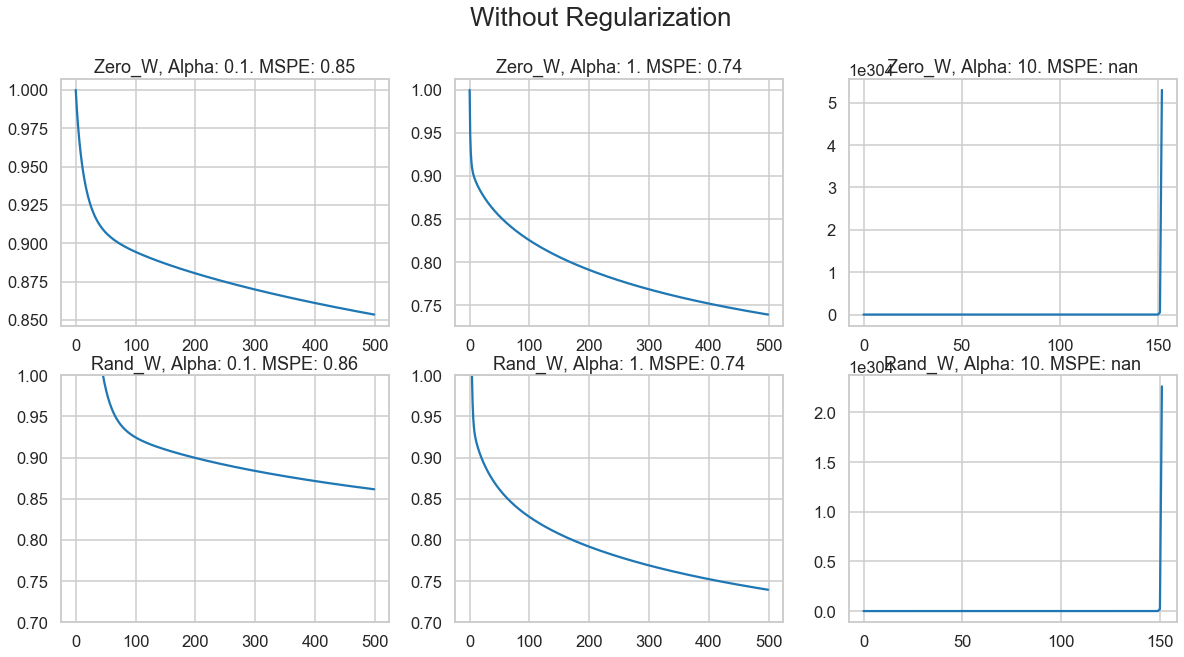

In [45]:
fig = plt.figure(figsize=(20, 10))
fig.suptitle("Without Regularization", fontsize="x-large")
plt.subplot(2, 3, 1)
plt.title('Zero_W, Alpha: 0.1. MSPE: {}'.format(round(mspe_dct[0.1][-1], 2)))
plt.plot(mspe_dct[0.1])
plt.subplot(2, 3, 2)
plt.title('Zero_W, Alpha: 1. MSPE: {}'.format(round(mspe_dct[1][-1], 2)))
plt.plot(mspe_dct[1])
plt.subplot(2, 3, 3)
plt.title('Zero_W, Alpha: 10. MSPE: {}'.format(round(mspe_dct[10][-1], 2)))
plt.plot(mspe_dct[10])
plt.subplot(2, 3, 4)
plt.ylim(top=1, bottom=0.7)
plt.title('Rand_W, Alpha: 0.1. MSPE: {}'.format(round(mspe_rand_dct[0.1][-1], 2)))
plt.plot(mspe_rand_dct[0.1])
plt.subplot(2, 3, 5)
plt.ylim(top=1, bottom=0.7)
plt.title('Rand_W, Alpha: 1. MSPE: {}'.format(round(mspe_rand_dct[1][-1], 2)))
plt.plot(mspe_rand_dct[1])
plt.subplot(2, 3, 6)
plt.title('Rand_W, Alpha: 10. MSPE: {}'.format(round(mspe_rand_dct[10][-1], 2)))
plt.plot(mspe_rand_dct[10]);

In [51]:
print('MSPE noreg train:', get_func(w_r_noreg[0.1], X_train, y_train))
print('MSPE noreg test :', get_func(w_r_noreg[0.1], X_test, y_test))

MSPE noreg train: 0.9407415170874233
MSPE noreg test : 0.9431869151315043


Вывод: На графике выше видно как важно правильно подбирать параметр шага обучения. Так как если взять очень низкий шаг, мы просто будем долго спускаться в минимум и в итоге осядем даже не в самом лучшем месте. Другая крайность использовать слишком большие веса, так как сразу же начинает происходить расхождение функции - мы высчитываем значение функции, регулируем веса, которые в свою очередь кидают нас условно говоря к значениям с еще большей ошибкой. И даже если мы выбрали верное направление градиента, наш градиент будет просто всегда "перескакивать" наш нам необходимый минимум. Что на счет начальных значений весов, мы видим что особой разницы здесь нету, так как в итоге рандомные значения весов в конечном итоге "догоняют" нулевые значения и сходятся они к одинаковому результату в одно время. Тем не менее на практике советуют все таки инициировать веса рандомными значениями, так как в конечном итоге после того как мы посчитали пару эпох, мы в итоге придем к тем же странным, похожим на рандомные значения результатам. Так почему бы сразу не инициировать их рандомом, если есть шанс угадать значений весов, которые будут сразу близки к минимуму функции. 

In [47]:
#-------------------------------------------------------------------------------------------------

**22. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [48]:
#rand_weights = np.random.rand(X_train.shape[1])
#zero_weights = np.zeros((X_train.shape[1]))
alphas = [0.01, 0.1, 1]
mspe_reg_zero = {}
mspe_reg_rand = {}
w_z_reg = {}
w_r_reg = {}

# Для весов с нулевыми значениями:
for alpha in alphas:
    #print('\nALPHA: ', alpha, '\n')
    w_z_reg[alpha], mspe_reg_zero[alpha] = grad_descent(X=X_train[:1000], y=y_train[:1000], w0=zero_weights, step_size=alpha, max_iter=500, eps=0.001, is_reg=True)
    #print('\n')

# Для весов с рандомными значениями:
for alpha in alphas:
    #print('\nALPHA: ', alpha, '\n')
    w_r_reg[alpha], mspe_reg_rand[alpha] = grad_descent(X=X_train[:1000], y=y_train[:1000], w0=rand_weights, step_size=alpha, max_iter=500, eps=0.001, is_reg=True)
    #print('\n')

/Users/administrator/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in square


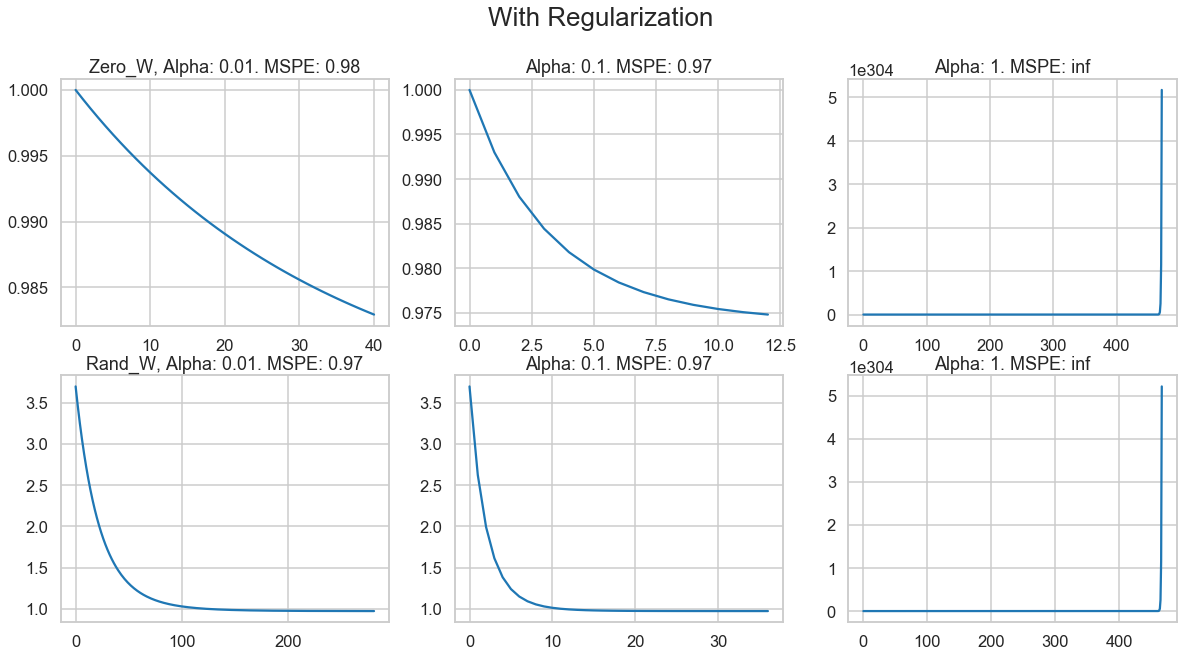

In [49]:
fig = plt.figure(figsize=(20, 10))
fig.suptitle("With Regularization", fontsize="x-large")
plt.subplot(2, 3, 1)
plt.title('Zero_W, Alpha: 0.01. MSPE: {}'.format(round(mspe_reg_zero[0.01][-1], 2)))
plt.plot(mspe_reg_zero[0.01])
plt.subplot(2, 3, 2)
plt.title('Alpha: 0.1. MSPE: {}'.format(round(mspe_reg_zero[0.1][-1], 2)))
plt.plot(mspe_reg_zero[0.1])
plt.subplot(2, 3, 3)
plt.title('Alpha: 1. MSPE: {}'.format(round(mspe_reg_zero[1][-1], 2)))
plt.plot(mspe_reg_zero[1])
plt.subplot(2, 3, 4)
plt.title('Rand_W, Alpha: 0.01. MSPE: {}'.format(round(mspe_reg_rand[0.01][-1], 2)))
plt.plot(mspe_reg_rand[0.01])
plt.subplot(2, 3, 5)
plt.title('Alpha: 0.1. MSPE: {}'.format(round(mspe_reg_rand[0.1][-1], 2)))
plt.plot(mspe_reg_rand[0.1])
plt.subplot(2, 3, 6)
plt.title('Alpha: 1. MSPE: {}'.format(round(mspe_reg_rand[1][-1], 2)))
plt.plot(mspe_reg_rand[1]);

In [50]:
print('MSPE reg train:', get_func(w_r_reg[0.1], X_train, y_train))
print('MSPE reg test :', get_func(w_r_reg[0.1], X_test, y_test))

MSPE reg train: 0.9753544265003847
MSPE reg test : 0.9768288898497354


Вывод: Сразу бросается в глаза то, что на 4х графиках их 6ти сработал принцип остановки. Возможно это произошло из-за того, что раз регуляризация ограничивает наши веса, то собственно и при вычислении новых весов во время работы градиентного спуска мы получили то что веса после нескольких эпох перестали изменяться на некоторую дельту (eps), что и вынудило сработать остановку. К тому же видно что со вводом регуляризации теперь даже с шагом обучения - 1 модель начала расходиться.

In [130]:
#-------------------------------------------------------------------------------------------------

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23. (1 доп. балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [55]:
import time

In [56]:
t0, t1 = 5, 50
def alpha_func(t):
    return t0 / (t + t1)

In [57]:
def sgd(X, y, w, step_size, max_iter, eps, is_reg):
    '''Calculating Stochastic Grad Descent'''
    mspe_list = []
    w_prev = w
    w_new = w_prev
    for epoch in range(max_iter):
        for i in range(y.shape[0]):
            rand_indx = np.random.randint(y.shape[0])
            xi = X[rand_indx:rand_indx+1]
            yi = y[rand_indx:rand_indx+1]

            if is_reg == True:
                mspe_L2 = get_reg_func(w_prev, X[:1000], y[:1000])
                mspe_list.append(mspe_L2)
                grad = get_reg_grad(w_prev, xi, yi)
            else:
                mspe = get_func(w_prev, X[:1000], y[:1000])
                mspe_list.append(mspe)
                grad = get_grad(w_prev, xi, yi)

            eta = alpha_func(epoch * y.shape[0] + i)
            w_new = w_prev - eta*grad
            if np.sqrt(np.sum((w_new - w_prev)**2)) < eps:
                break
            w_prev = w_new
    return w_new, mspe_list

In [58]:
#-------------------------------------------------------------------------------------------------

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [61]:
w_sgd_noreg_zero, mspe_sgd_noreg_zero = sgd(X=X_train, y=y_train, w=zero_weights, step_size=0.01, max_iter=1000, eps=0.001, is_reg=False)
w_sgd_noreg_rand, mspe_sgd_noreg_rand = sgd(X=X_train, y=y_train, w=rand_weights, step_size=0.01, max_iter=1000, eps=0.001, is_reg=False)

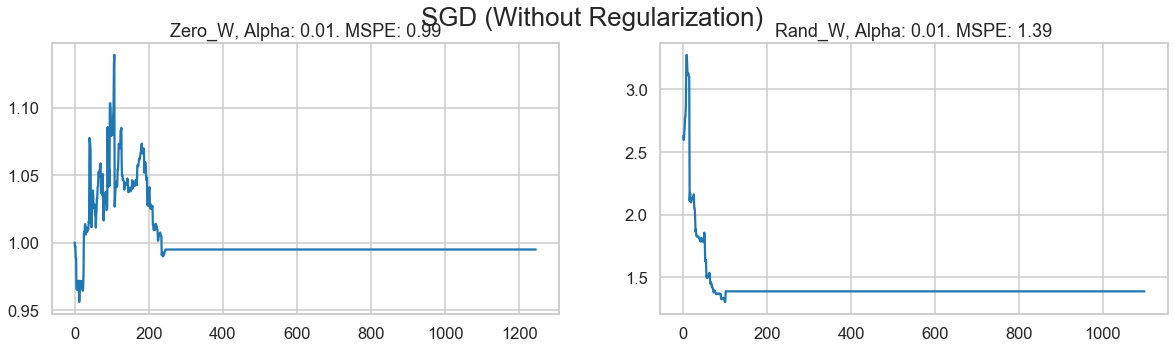

In [70]:
fig = plt.figure(figsize=(20, 5))
fig.suptitle("SGD (Without Regularization)", fontsize="x-large")
plt.subplot(1, 2, 1)
plt.title('Zero_W, Alpha: 0.01. MSPE: {}'.format(round(mspe_sgd_noreg_zero[-1], 2)))
plt.plot(mspe_sgd_noreg_zero)
plt.subplot(1, 2, 2)
plt.title('Rand_W, Alpha: 0.01. MSPE: {}'.format(round(mspe_sgd_noreg_rand[-1], 2)))
plt.plot(mspe_sgd_noreg_rand)

In [63]:
print("Without Regularization:")
print('MSPE reg train:', get_func(w_sgd_noreg_rand, X_train, y_train))
print('MSPE reg test :', get_func(w_sgd_noreg_rand, X_test, y_test))
print('MSE reg test :', mean_squared_error(y_test, make_pred(X_test, w_sgd_noreg_rand)))
print('R2 reg test :', r2_score(y_test, make_pred(X_test, w_sgd_noreg_rand)))

Without Regularization:
MSPE reg train: 1.436643614192806
MSPE reg test : 1.4248455060489655
MSE reg test : 1324.5419194679362
R2 reg test : -0.11440059852072237


In [64]:
w_sgd_reg_zero, mspe_sgd_reg_zero = sgd(X=X_train, y=y_train, w=zero_weights, step_size=0.01, max_iter=1000, eps=0.001, is_reg=True)
w_sgd_reg_rand, mspe_sgd_reg_rand = sgd(X=X_train, y=y_train, w=rand_weights, step_size=0.01, max_iter=1000, eps=0.001, is_reg=True)

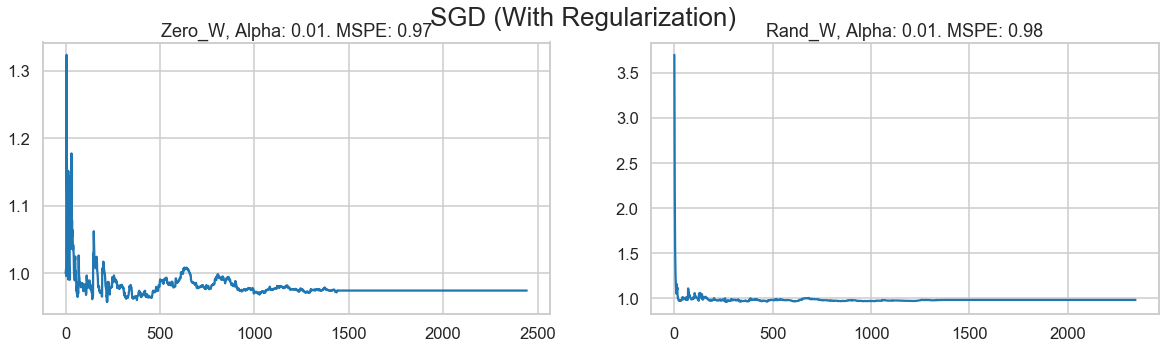

In [71]:
fig = plt.figure(figsize=(20, 5))
fig.suptitle("SGD (With Regularization)", fontsize="x-large")
plt.subplot(1, 2, 1)
plt.title('Zero_W, Alpha: 0.01. MSPE: {}'.format(round(mspe_sgd_reg_zero[-1], 2)))
plt.plot(mspe_sgd_reg_zero)
plt.subplot(1, 2, 2)
plt.title('Rand_W, Alpha: 0.01. MSPE: {}'.format(round(mspe_sgd_reg_rand[-1], 2)))
plt.plot(mspe_sgd_reg_rand)

In [66]:
print("WITH Regularization:")
print('MSPE reg test :', get_func(w_sgd_reg_rand, X_test, y_test))
print('MSE reg test :', mean_squared_error(y_test, make_pred(X_test, w_sgd_reg_rand)))
print('R2 reg test :', r2_score(y_test, make_pred(X_test, w_sgd_reg_rand)))

WITH Regularization:
MSPE reg test : 0.9812640966700643
MSE reg test : 1305.3740870193108
R2 reg test : -0.09827378241989737


In [132]:
#-------------------------------------------------------------------------------------------------

**24. (0.5 доп. балла)** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

Вывод: Видно как после введения регуляризации мы получили значения MSPE и MSE лучше чем без использования регуляризации. Возможно это произошло из-за того, что регуляризация избавилась от шума в обучении и смогла лучше обобщить наши данные.

In [67]:
#-------------------------------------------------------------------------------------------------

In [72]:
def minibatch_grad(X, y, w, step_size, batch_size, max_iter, eps, is_reg):
    '''Calculating Stochastic Grad Descent'''
    mspe_list = []
    w_prev = w
    w_new = w_prev
    for epoch in range(max_iter):
        for i in range(y.shape[0]):
            rand_indx = np.random.randint(y.shape[0]-batch_size)
            xi = X[rand_indx:rand_indx+100]
            yi = y[rand_indx:rand_indx+100]

            if is_reg == True:
                mspe_L2 = get_reg_func(w_prev, X[:1000], y[:1000])
                mspe_list.append(mspe_L2)
                grad = get_reg_grad(w_prev, xi, yi)
            else:
                mspe = get_func(w_prev, X[:1000], y[:1000])
                mspe_list.append(mspe)
                grad = get_grad(w_prev, xi, yi)

            eta = alpha_func(epoch * y.shape[0] + i)
            w_new = w_prev - eta*grad
            if np.sqrt(np.sum((w_new - w_prev)**2)) < eps:
                break
            w_prev = w_new
    return w_new, mspe_list

In [73]:
w_mb_noreg_zero, mspe_mb_noreg_zero = minibatch_grad(X=X_train, y=y_train, w=zero_weights, batch_size=100, step_size=0.1, max_iter=1000, eps=0.01, is_reg=False)
w_mb_noreg_rand, mspe_mb_noreg_rand = minibatch_grad(X=X_train, y=y_train, w=rand_weights, batch_size=100, step_size=0.1, max_iter=1000, eps=0.01, is_reg=False)

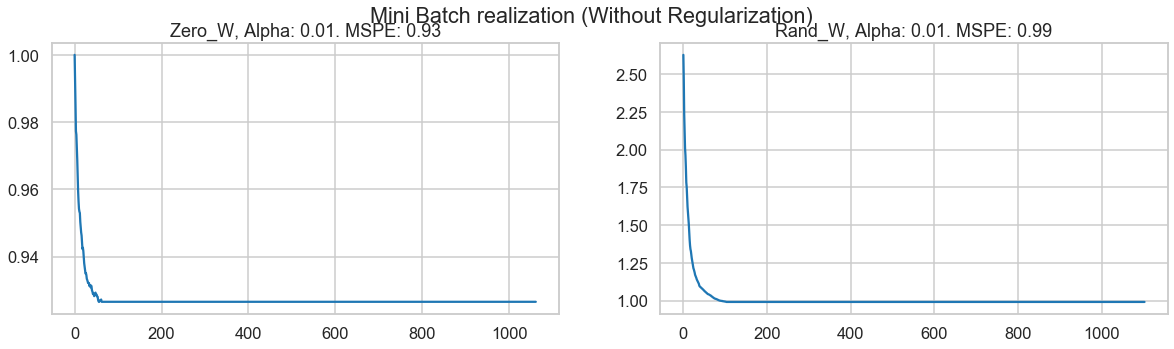

In [74]:
fig = plt.figure(figsize=(20, 5))
fig.suptitle("Mini Batch realization (Without Regularization)", fontsize="large")
plt.subplot(1, 2, 1)
plt.title('Zero_W, Alpha: 0.01. MSPE: {}'.format(round(mspe_mb_noreg_zero[-1], 2)))
plt.plot(mspe_mb_noreg_zero)
plt.subplot(1, 2, 2)
plt.title('Rand_W, Alpha: 0.01. MSPE: {}'.format(round(mspe_mb_noreg_rand[-1], 2)))
plt.plot(mspe_mb_noreg_rand)

In [75]:
w_mb_reg_zero, mspe_mb_reg_zero = minibatch_grad(X=X_train, y=y_train, w=zero_weights, batch_size=100, step_size=0.1, max_iter=1000, eps=0.01, is_reg=True)
w_mb_reg_rand, mspe_mb_reg_rand = minibatch_grad(X=X_train, y=y_train, w=rand_weights, batch_size=100, step_size=0.1, max_iter=1000, eps=0.01, is_reg=True)

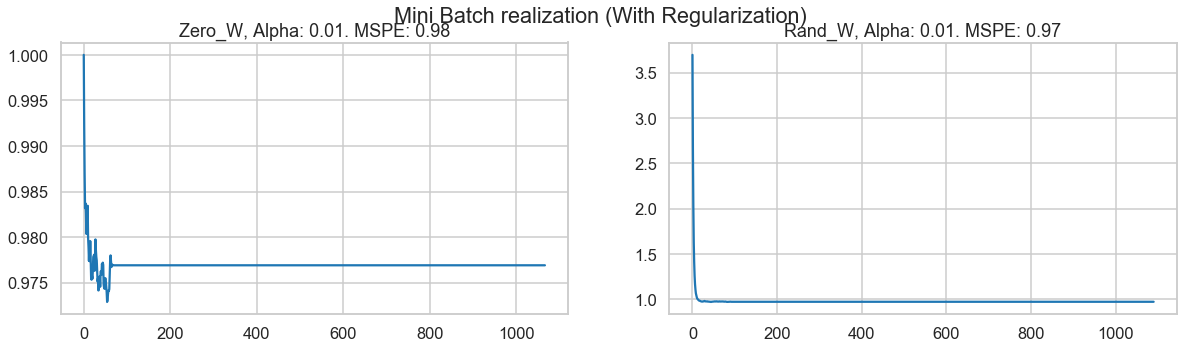

In [76]:
fig = plt.figure(figsize=(20, 5))
fig.suptitle("Mini Batch realization (With Regularization)", fontsize="large")
plt.subplot(1, 2, 1)
plt.title('Zero_W, Alpha: 0.01. MSPE: {}'.format(round(mspe_mb_reg_zero[-1], 2)))
plt.plot(mspe_mb_reg_zero)
plt.subplot(1, 2, 2)
plt.title('Rand_W, Alpha: 0.01. MSPE: {}'.format(round(mspe_mb_reg_rand[-1], 2)))
plt.plot(mspe_mb_reg_rand)

Вывод: Раз зашла работа со стохастическим градиентным спуском, было очень просто реализовать так же и минибатчевый метод градиентного спуска. За 1 минибатч было выбрано 100 примеров. Видно, что данный метод по прежнему можно использовать на полном наборе данных, как и СГД, в то время как пакетный градиентный спуск работал только на грубо говоря 1000 примеров. После запуска минибатчевого градиентного спуска видно, что в принципе это есть что то среднее между пакетным градиентным спуском и СГД. Используется среднее значение минибатча для сглаживания стохастических движений, в то же время батч не на столько большой, чтобы застопить работу градиентного спуска.

**25. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [77]:
lin = LinearRegression().fit(X_train, y_train)

In [78]:
mean_squared_error(y_train, lin.predict(X_train))

1167.3690839892706

In [80]:
print("MSE test with coef of liniar regression: ", mean_squared_error(y_test, lin.predict(X_test)))
print("MSPE test with coef of liniar regression: ", get_func(lin.coef_, X_test, y_test))
print('MSPE noreg test after gradient descent:', get_func(w_r_noreg[1], X_test, y_test))

MSE test with coef of liniar regression:  3.463411981370485e+20
MSPE test with coef of liniar regression:  2.1590261510801523e+26
MSPE noreg test after gradient descent: 1.0125396163736593


Вывод: После обучения модели линейной регрессии с помощью методов sklearn мы получили не самые лучшие результаты. Сравнивая с нашим градиентным спуском, значения, полученные с помощью стандартной линейной регрессии вышли совершенно не рабочими. MSE ошибка в 20й степени, в то же время наши значения получились также не самыми лучшими, но лучше чем у стандартной реализации sklearn.

In [81]:
#-------------------------------------------------------------------------------------------------

Здесь вы можете поделиться своими мыслями по поводу этого задания.

В связи с неутешительными результатами, я провел дополнительную работу на другом датасете, чтобы понять как работает градиентный спуск и MSE/MSPE ошибки. А именно была продолжена работа с методом главных компонент (PCA). Была сформирована выборка из 5 главных компонент. После использования линейной регрессии были получены следующие результаты:

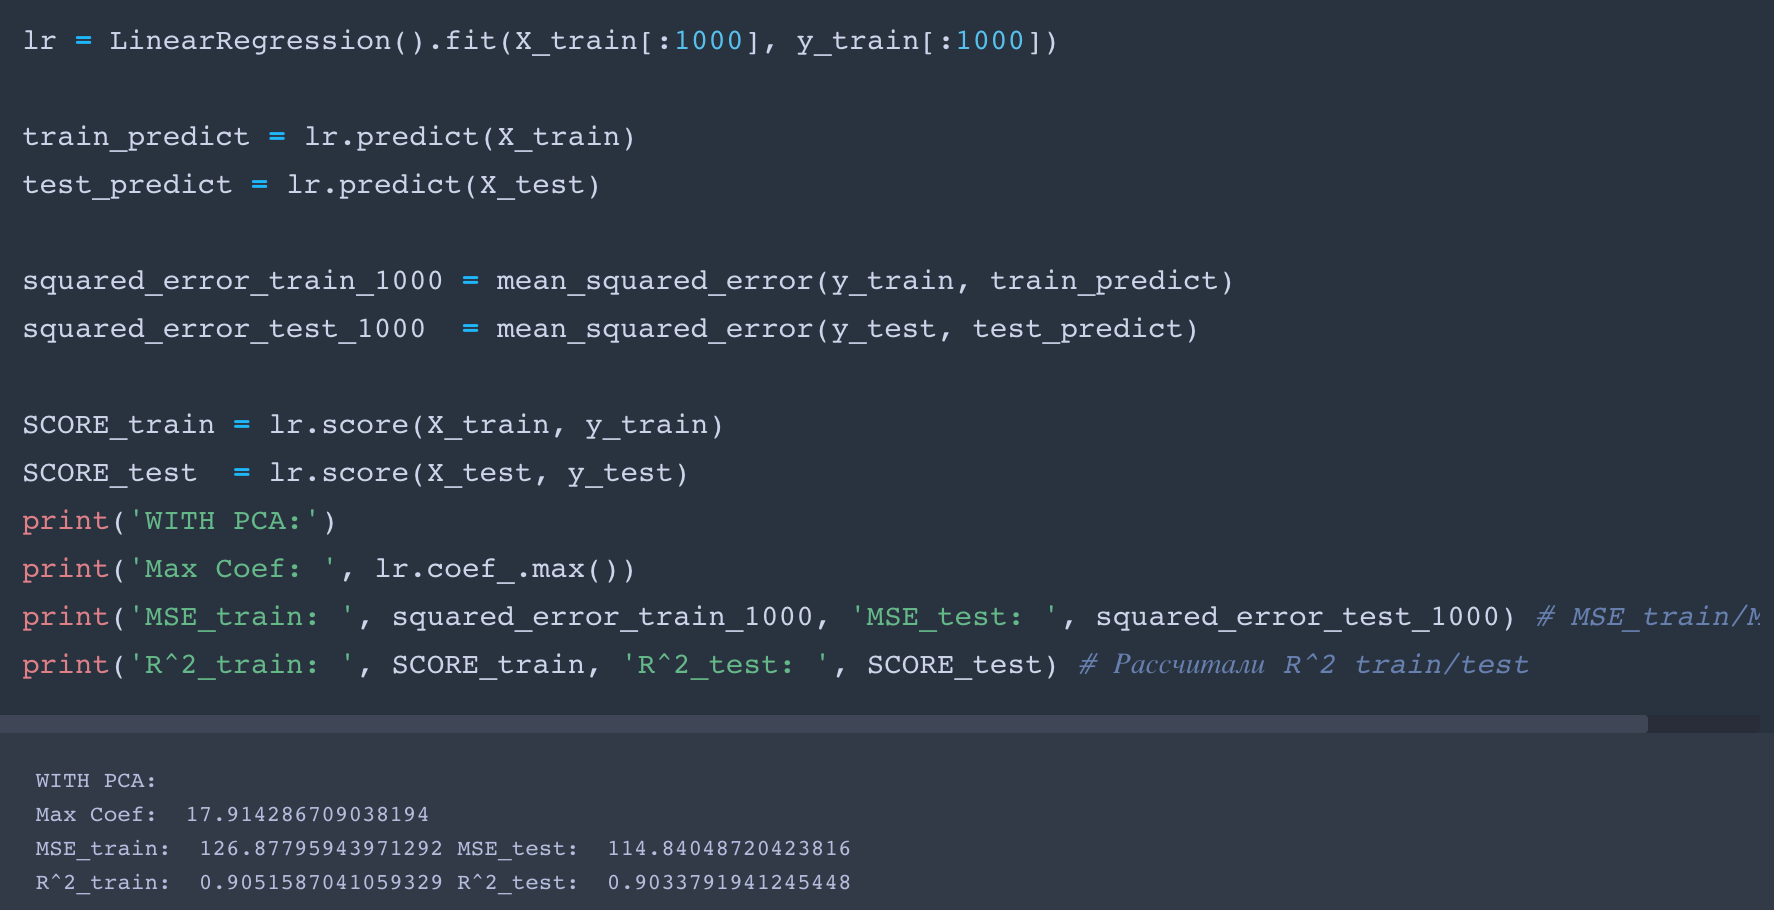

После я сделал градиентный спуск с помощью MSPE ошибки и получил в конечном итоге R^2 = 0.12 что является не самым лучшим результатом.

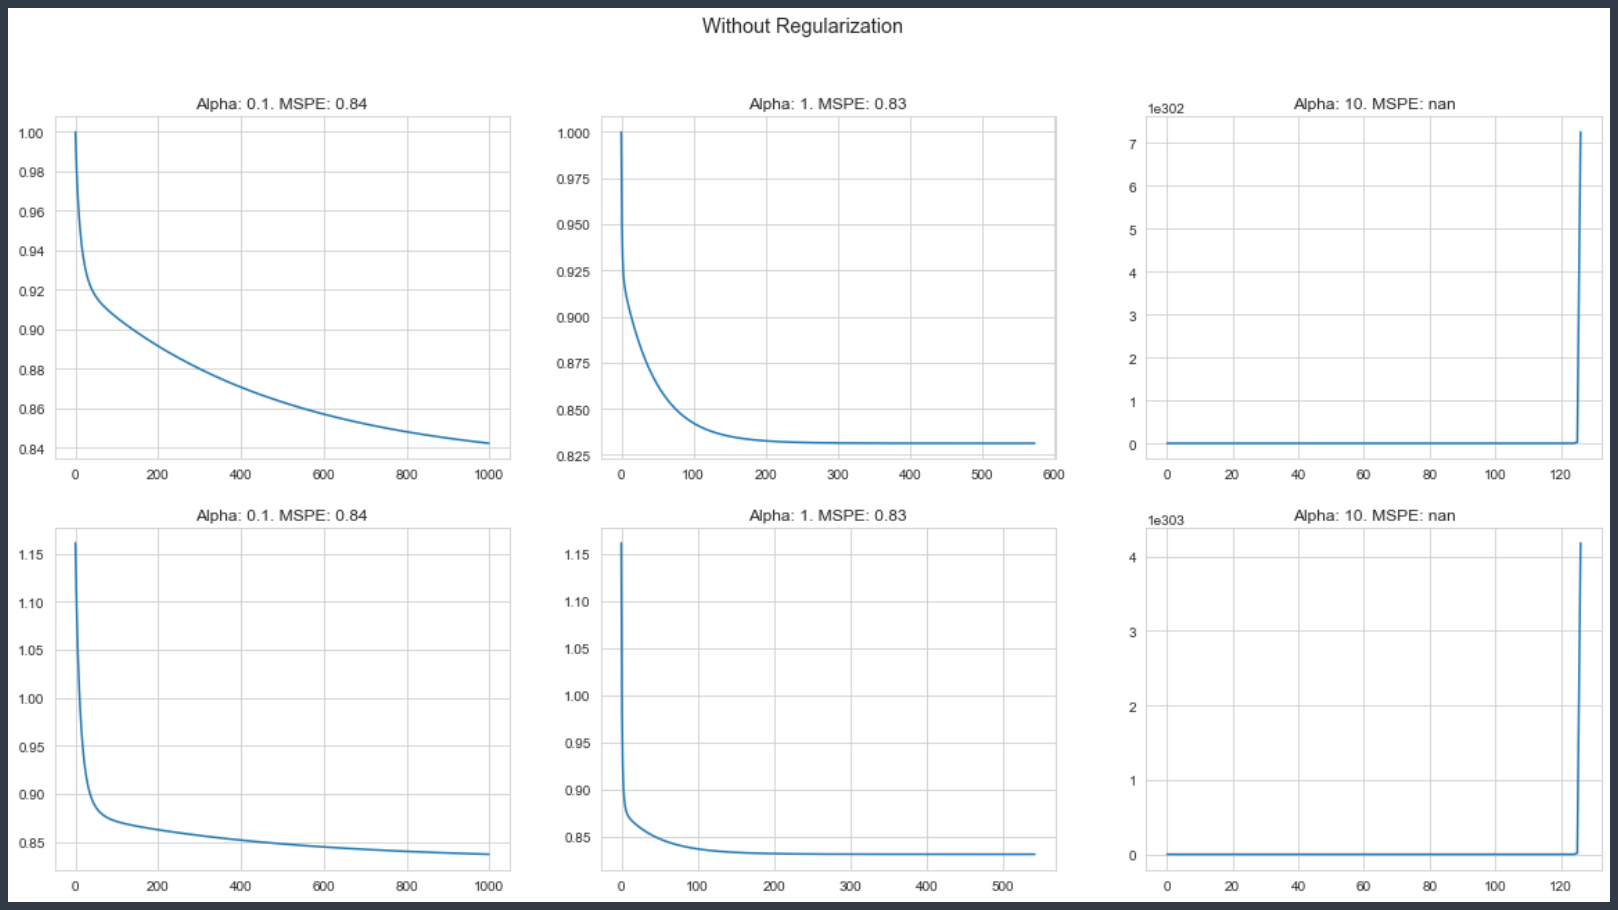
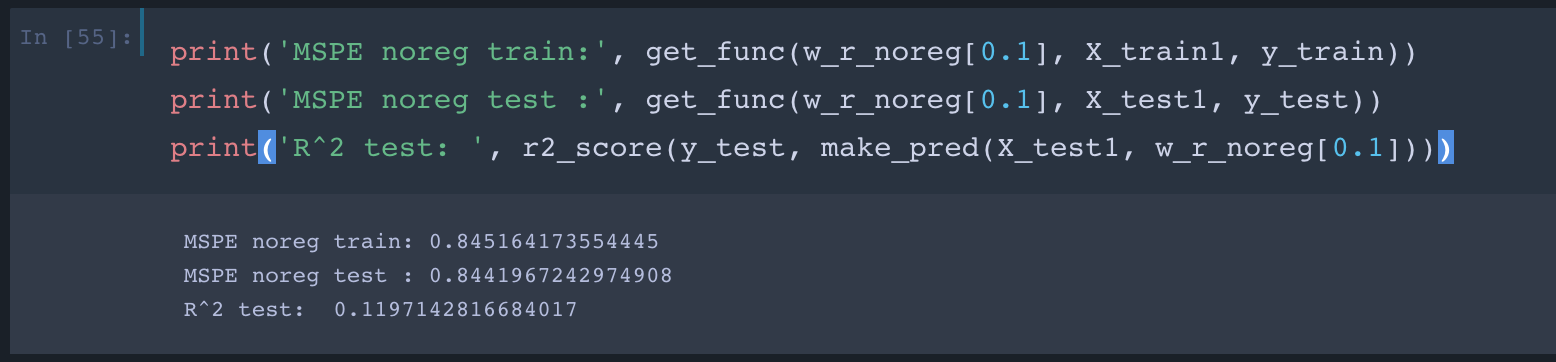

Тогда я переделал код, чтобы градиентый спуск минимизировал MSE функцию и я получил следующие результаты: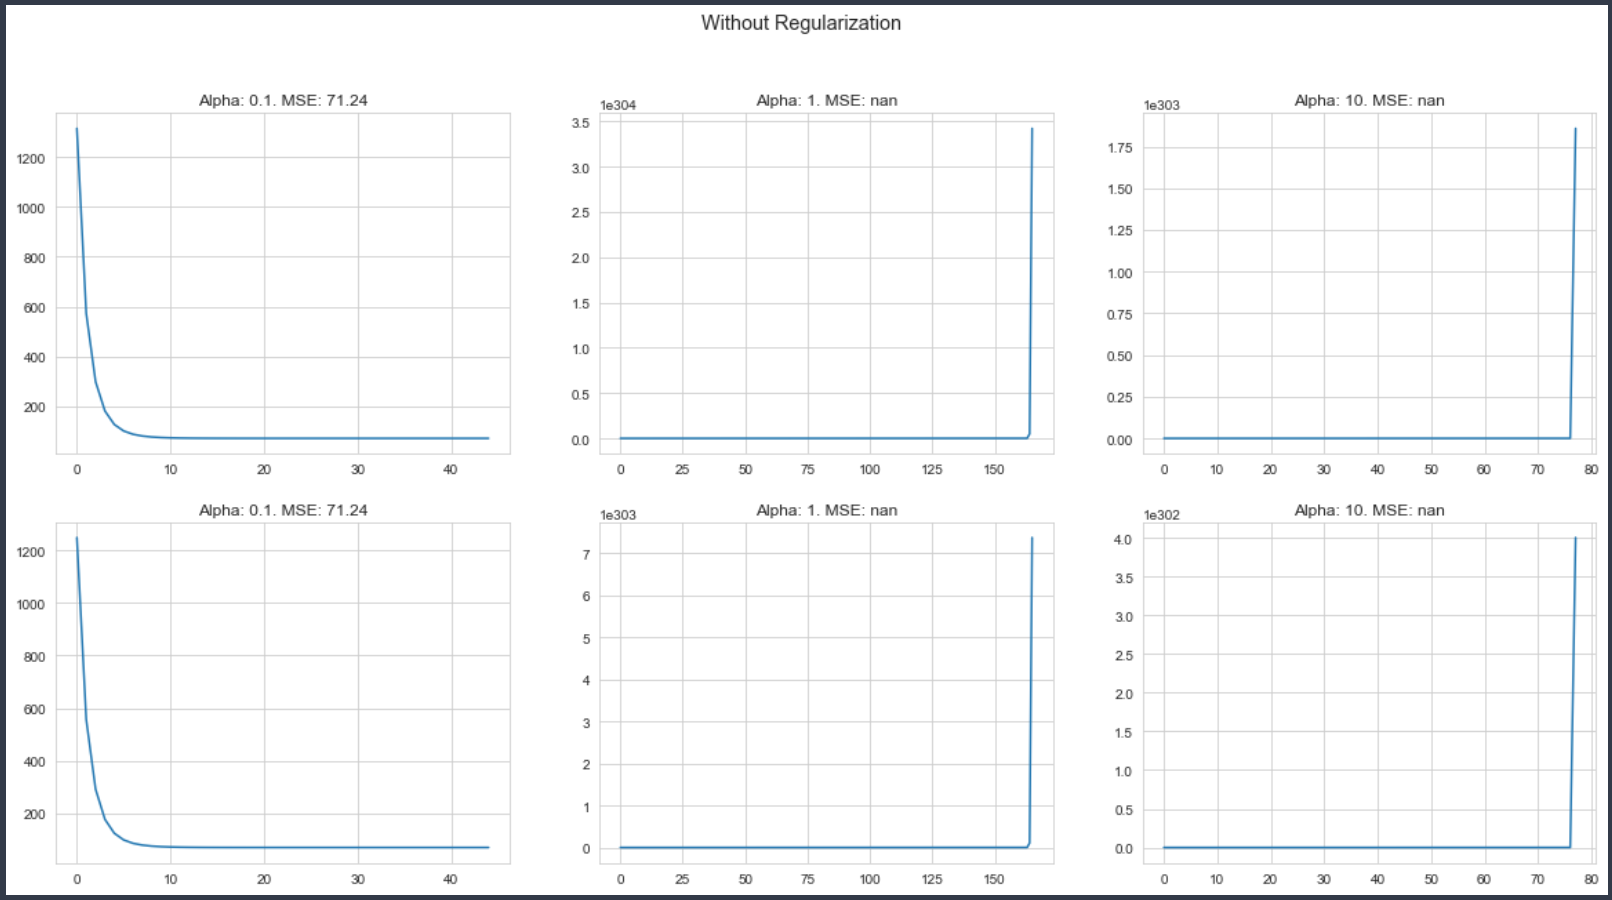
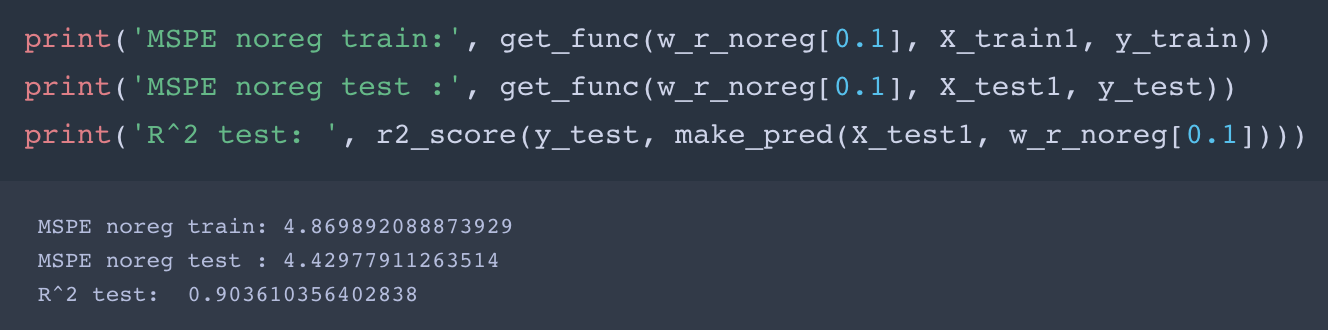

На выходе я получил значение MSPE все таки больше, но тем не менее R^2 дает нам возможность предполагать, что мы по сути можем предсказывать наши данные в 90 процентах случаев, что уже является не только хорошим результатом, но и практически эталонным, так как с помощью линейной регрессии и нормального уравнения был достигнут тот же самый результат.

ВЫВОД: Таким образом можно сделать вывод, что для данной задачи выбор функции ошибки MSPE это далеко не самый лучший выбор, так как он позволяет в конечном итоге нам предсказывать только 12 процентов наших данных и для данной ситуации, как и для большинства других подойдет более неизменная функция ошибки MSE, которая после градиентного спуска позволяет описывать 90 процентов наших данных. 

А здесь — вставить вашу любимую картинку.